<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Artificial Intelligence and Machine Learning</center></font></h1>
<h1><center>Unsupervised Learning - Week 2</center></h1>

<center><img src="https://images.pexels.com/photos/386000/pexels-photo-386000.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2" width="700" height="600"></center>

<b><h2><center>Tourism Case Study - Week 2</center></h2></b>

## Problem Statement

### Context

Tourism is now recognized as a directly measurable activity, enabling more accurate analysis and more effective policies can be made for tourism. Whereas previously the sector relied mostly on approximations from related areas of measurement (e.g. Balance of Payments statistics), tourism nowadays is a productive activity that can be analyzed using factors like economic indicators, social indicators, environmental & infrastructure indicators, etc. As a Data Scientist in a leading tours and travels company, you have been assigned the task of analyzing several of these factors and group countries based on them to help understand the key locations where the company can invest in tourism services.

### Objective

To explore the data and identify different groups of countries based on important factors to find key locations where investments can be made to promote tourism services.


### Key Questions

- How many different groups/clusters of countries can be found from the data?
- How do the different clusters vary?
- How to use PCA to retain the components which explain 90% variance?
- How to perform clustering using the components obtained from PCA?


### Data Description

This dataset contains key statistical indicators of the countries. It covers sections like general information, economic indicators, social indicators, environmental & infrastructural indicators. 
 
### Data Description

This dataset contains key statistical indicators of the countries. It covers sections like general information, economic indicators, social indicators, environmental & infrastructural indicators. 
 
**Data Dictionary**
- country: country
- Region: region of the country
- Surface area: Surface area in sq. km
- Population in thousands: Population of the country, in thousands, as in the year 2017
- Population density: Population density per km2, as in the year 2017
- GDP: Gross domestic product: GDP of the country in million USD
- Economy: Agriculture: Contribution of agriculture to the economy as a percentage of Gross Value Added
- Economy: Industry: Contribution of the industry to the economy as a percentage of Gross Value Added
- Economy: Services and other activity: Contribution of services and other activities to the economy as a percentage of Gross Value Added
- International trade: Balance: Amount, in million USD, of balance between international exports and imports
- Health: Total expenditure: Total expenditure on healthcare facilities as a percentage of GDP
- Education: Government expenditure: Total expenditure on education as a percentage of GDP
- Mobile-cellular subscriptions: no. of mobile/cellular subscriptions per 100 people
- Individuals using the Internet: no. of individuals using the Internet per 100 people 

### Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

## Reading the Dataset

In [ ]:
# loading the dataset
data = pd.read_csv("country_stats.csv")

### View the random 10 rows of the dataset.

In [ ]:
# viewing a random sample of the dataset
data.sample(n=10, random_state=1)

,country,Region,Surface area,Population in thousands,Population density,GDP: Gross domestic product,Economy: Agriculture,Economy: Industry,Economy: Services and other activity,International trade: Balance,Health: Total expenditure,Education: Government expenditure,Mobile-cellular subscriptions,Individuals using the Internet
39,Central African Republic,MiddleAfrica,622984.0,4659,7.5,1633.0,34.9,24.8,40.4,66.0,4.2,1.2,20.4,60.0
170,Saint Kitts and Nevis,Caribbean,261.0,55,212.9,876.0,1.2,28.1,70.7,-280.0,5.1,2.8,131.8,52.0
93,Hungary,EasternEurope,93024.0,9722,107.4,121715.0,4.1,31.9,64.0,11027.0,7.4,4.7,118.9,66.0
62,Egypt,NorthernAfrica,1002000.0,97553,98.0,315917.0,11.2,36.3,52.5,-35545.0,5.6,NaN,111.0,156.0
199,Tajikistan,CentralAsia,142600.0,8921,63.7,7853.0,25.0,28.0,47.1,-2132.0,6.9,5.2,98.6,45.0
173,Saint Vincent and the Grenadines,Caribbean,389.0,110,281.8,738.0,7.5,17.2,75.3,-288.0,8.6,NaN,103.6,58.0
38,Cayman Islands,Caribbean,264.0,62,256.5,3726.0,0.3,7.5,92.2,-972.0,NaN,NaN,155.5,74.0
124,Mali,WesternAfrica,1240192.0,18542,15.2,13100.0,39.9,19.6,40.5,520.0,7.0,3.7,139.6,42.0
107,Kenya,EasternAfrica,591958.0,49700,87.3,63399.0,32.0,19.0,49.0,-8420.0,5.7,5.3,80.7,480.0
89,Guyana,SouthAmerica,214969.0,778,4.0,3282.0,17.6,31.7,50.6,-172.0,5.2,3.2,67.2,94.0


### Checking the shape of the dataset

In [ ]:
data.shape

(229, 14)

* The dataset has 229 rows and 14 columns 

In [ ]:
# copying the data to another variable to avoid any changes to original data
df1 = data.copy()

## Overview of the Dataset

The initial steps to get an overview of any dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Check the data types of the columns for the dataset.

In [ ]:
# checking datatypes and number of non-null values for each column
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   country                               229 non-null    object 
 1   Region                                229 non-null    object 
 2   Surface area                          226 non-null    float64
 3   Population in thousands               229 non-null    int64  
 4   Population density                    229 non-null    float64
 5   GDP: Gross domestic product           208 non-null    float64
 6   Economy: Agriculture                  206 non-null    float64
 7   Economy: Industry                     208 non-null    float64
 8   Economy: Services and other activity  208 non-null    float64
 9   International trade: Balance          210 non-null    float64
 10  Health: Total expenditure             190 non-null    float64
 11  Education: Governme

**Observations**

- Except for country and Region variables, remaining all the variables are numeric variables.
- We can observe that there are missing values present in some of the variables. 

### Summary of the dataset.

In [ ]:
# Let's look at the statistical summary of the data
df1.describe(include="all").T### Summary of the dataset.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,229,229,San Marino,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,229,22,Caribbean,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Surface area,226,NaN,NaN,NaN,593210,1.79602e+06,1e-05,4306.5,83735.5,437694,1.70982e+07
Population in thousands,229,NaN,NaN,NaN,32756.8,133275,1,431,5448,19193,1.40952e+06
Population density,229,NaN,NaN,NaN,462.825,2305.38,0.1,35.9,88.1,222.8,25969.8
GDP: Gross domestic product,208,NaN,NaN,NaN,353896,1.54816e+06,33,4987,23871,174552,1.80366e+07
Economy: Agriculture,206,NaN,NaN,NaN,11.4816,12.1006,1e-05,2.4,7.2,17.5,70.8
Economy: Industry,208,NaN,NaN,NaN,27.5654,13.1244,4,19.075,26.45,33.325,79.9
Economy: Services and other activity,208,NaN,NaN,NaN,61.0894,15.5049,14.9,51,61.3,72.1,94
International trade: Balance,210,NaN,NaN,NaN,-683.862,73188.2,-796494,-3501.25,-984,49.25,530285


**Observations**

- There are 229 rows indicating countries from 22 different regions.
- There are several variables which indicate the economic condition of a country.
- Except for country and Region, all columns are numeric in nature.
- The numerical variables have different ranges and have to be scaled before clustering.
- There are missing values in the data which have to be dealt with.

## Exploratory Data Analysis

### Univariate Analysis

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

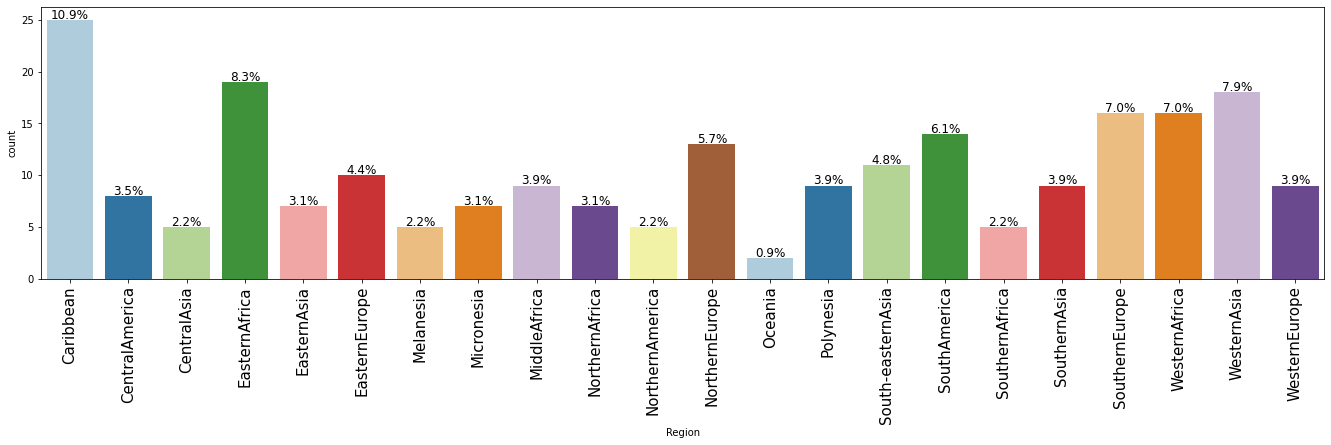

In [ ]:
labeled_barplot(df1, "Region", perc=True)

**Observations**

- Approx. 11% of the countries in the data are from the Caribbean region.
- Oceania has the least number of countries in the data.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

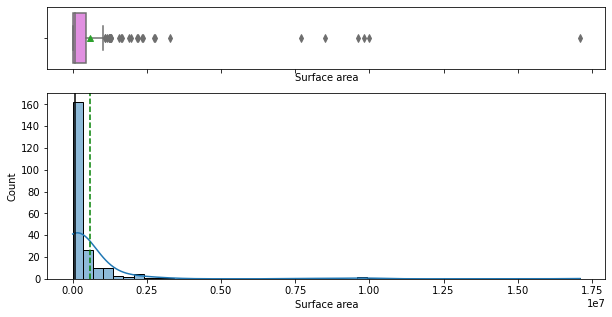

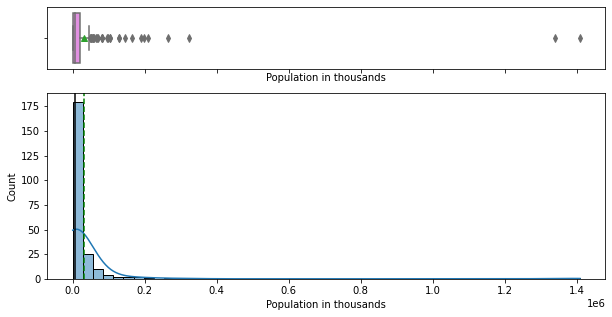

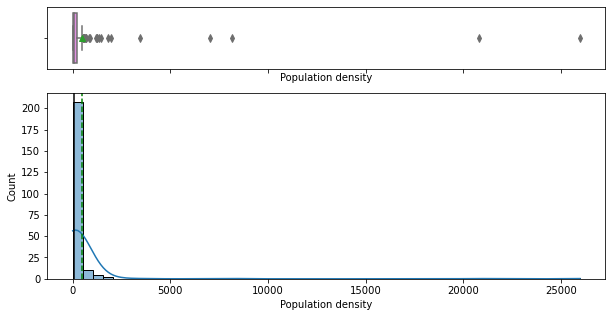

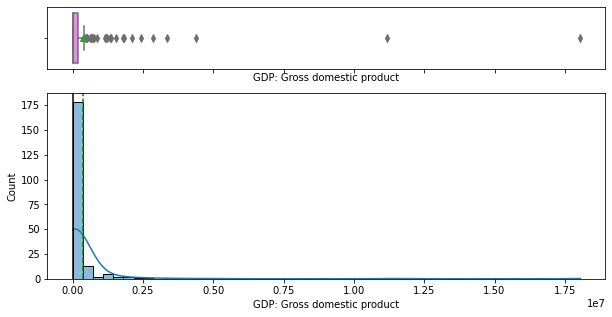

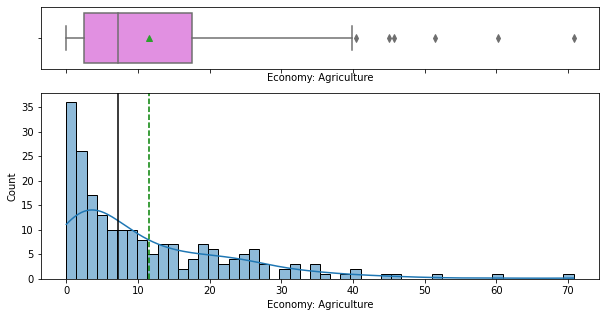

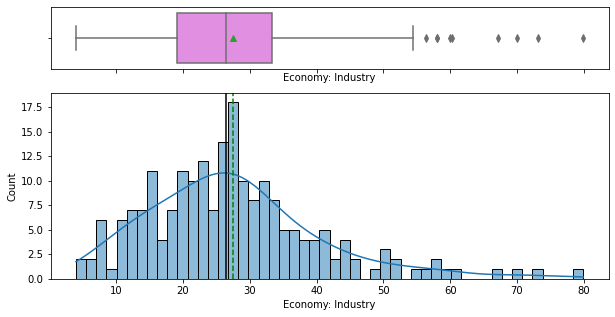

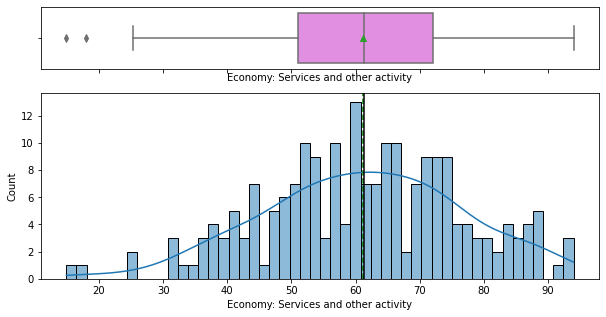

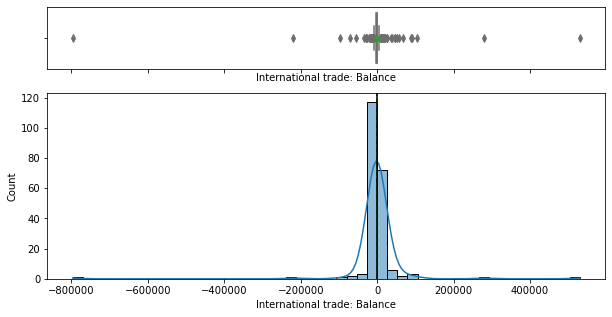

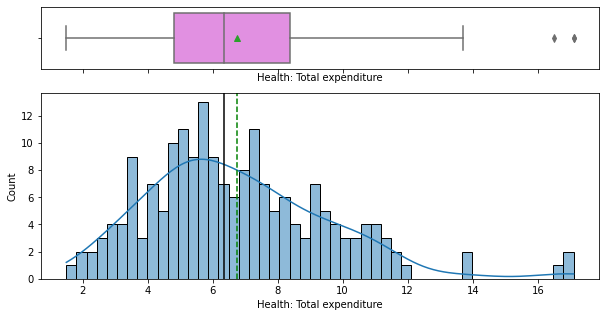

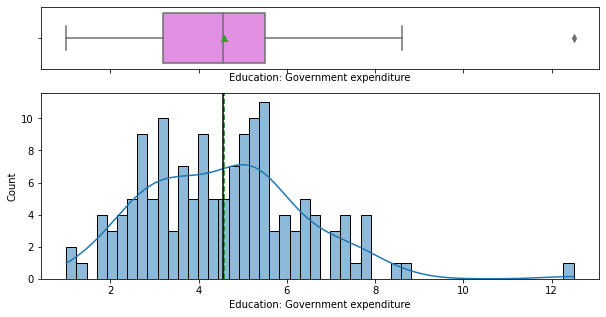

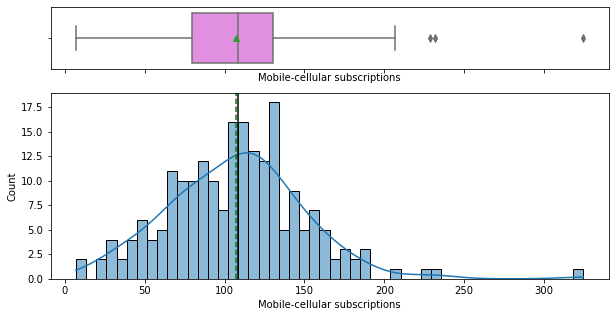

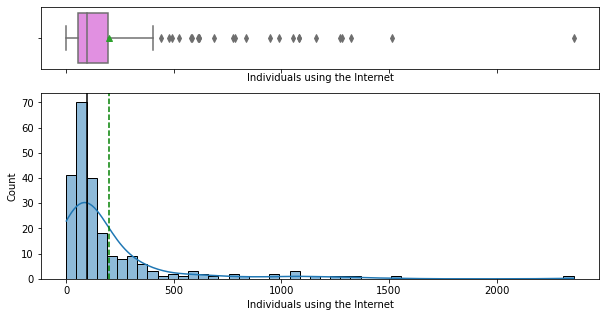

In [ ]:
# selecting numerical columns
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

for item in num_cols:
    histogram_boxplot(df1, item, bins=50, kde=True, figsize=(10, 5))

**Observations**

- Variables like *Surface area*, *Population in thousands*, *Population density*, *GDP*, etc. are right-skewed and have extreme upper outliers.
- *International trade: Balance* is symmetrically distributed.

### Bivariate Analysis

**Let's check for correlations.**

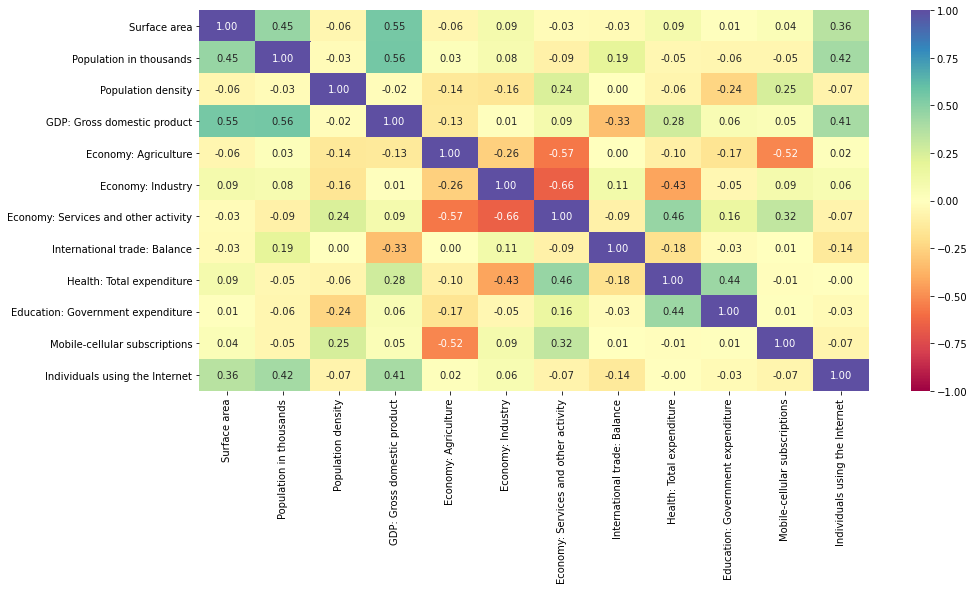

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    df1[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observations**

- Population in thousands is positively correlated to GDP.
- Economy: Services and other activity is negatively correlated with Economy industry. 

## Data Preprocessing

### Checking for Null Values

In [ ]:
# checking for missing values

df1.isnull().sum()

country                                  0
Region                                   0
Surface area                             3
Population in thousands                  0
Population density                       0
GDP: Gross domestic product             21
Economy: Agriculture                    23
Economy: Industry                       21
Economy: Services and other activity    21
International trade: Balance            19
Health: Total expenditure               39
Education: Government expenditure       81
Mobile-cellular subscriptions           20
Individuals using the Internet           1
dtype: int64

#### How do impute the missing values?
- For numerical columns, central tendency measures such as mean or median can be used to impute the missing values.
       1. If the columns having missing values are of a normally distributed (Symmetric), then mean can be used to impute.
       2. If the columns having missing values are right/left skewed, then median can be used to impute.
- For categorical columns, then mode can be used to impute the missing values.


- From the above univariate analysis, we can observe that most of the columns are right-skewed. So, we will impute the missing values by the median of the attributes grouped by region.

In [ ]:
for col in df1.iloc[:, 2:].columns.tolist():
    df1[col] = df1.groupby(["Region"])[col].transform(lambda x: x.fillna(x.median()))

# checking for missing values
df1.isna().sum()

country                                 0
Region                                  0
Surface area                            0
Population in thousands                 0
Population density                      0
GDP: Gross domestic product             0
Economy: Agriculture                    0
Economy: Industry                       0
Economy: Services and other activity    0
International trade: Balance            0
Health: Total expenditure               0
Education: Government expenditure       0
Mobile-cellular subscriptions           0
Individuals using the Internet          0
dtype: int64

- All missing values have been imputed.

### **What is feature scaling?**

Feature scaling is a class of statistical techniques that, as the name implies, scales the features of our data so that they all have a similar range. You'll understand better if we look at an example:

If you have multiple independent variables like age, salary, and height, With their range as (18–100 Years), (25,000–75,000 Euros), and (1–2 Meters) respectively, feature scaling would help them all to be in the same range.

### **Why feature scaling is improtant in Unsupervised Learning?**

Feature scaling is specially relevant in machine learning models that compute some sort of distance metric, like most clustering methods like K-Means. 

So, scaling should be done to avoid the problem of one feature dominating over others because the unsupervised learning algorithm uses distance to find the similarity between data points.

### **Let's scale the data.**

#### Standard Scaler
StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.

![SC.png](attachment:SC.png)

1. Data standardization is the process of rescaling the attributes so that they have a mean of 0 and a variance of 1.
2. The ultimate goal to perform standardization is to bring down all the features to a common scale without distorting the differences in the range of the values.
3. In sklearn.preprocessing.StandardScaler(), centering and scaling happen independently on each feature.

In [ ]:
sc = StandardScaler()
subset_scaled_df = pd.DataFrame(
    sc.fit_transform(df1.drop(["country", "Region"], axis=1)),
    columns=df1.drop(["country", "Region"], axis=1).columns,
)
subset_scaled_df.head()

,Surface area,Population in thousands,Population density,GDP: Gross domestic product,Economy: Agriculture,Economy: Industry,Economy: Services and other activity,International trade: Balance,Health: Total expenditure,Education: Government expenditure,Mobile-cellular subscriptions,Individuals using the Internet
0,0.035310,0.020854,-0.177549,-0.210173,1.042856,-0.274480,-0.553324,-0.022866,0.477955,-0.768586,-1.047607,-0.532544
1,-0.315158,-0.224289,-0.154727,-0.216092,0.966043,-0.064870,-0.659127,-0.031399,-0.364263,-0.669595,0.012310,-0.234595
2,1.006147,0.064378,-0.193677,-0.112187,0.095503,0.812389,-0.738478,-0.237101,0.111773,0.716281,0.168458,-0.217666
3,-0.331189,-0.245901,-0.080260,-0.223645,-0.152004,-1.159503,0.326156,0.006091,0.111773,-0.471613,-1.036960,-0.363255
4,-0.331038,-0.245743,-0.129991,-0.222011,-0.903058,-1.244900,1.780935,-0.010646,0.441337,-0.768586,-0.420647,-0.630731


Let's find the Cophenetic correlation for different distances with different linkage methods.

### What is Cophenetic correlation? 

The cophenetic correlation coefficient is a correlation coefficient between the cophenetic distances(Dendrogramic distance) obtained from the tree, and the original distances used to construct the tree. It is a measure of how faithfully a dendrogram preserves the pairwise distances between the original unmodeled data points. 

The cophenetic distance between two observations is represented in a dendrogram by the height of the link at which those two observations are first joined. That height is the distance between the two subclusters that are merged by that link.

Cophenetic correlation is the way to compare two or more dendrograms. 

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9155400692823863.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7825108242995893.
Cophenetic correlation for Euclidean distance and average linkage is 0.9346981702379014.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8344399530606008.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9095973699627771.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.842117178747162.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9141365131195625.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8792996800400401.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.8449434742316885.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7845772349957589.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8729332119700149.
Cophenetic cor

In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9346981702379014, which is obtained with Euclidean distance and average linkage.


**Let's explore different linkage methods with Euclidean distance only.**

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9155400692823863.
Cophenetic correlation for complete linkage is 0.7825108242995893.
Cophenetic correlation for average linkage is 0.9346981702379014.
Cophenetic correlation for centroid linkage is 0.9484608827294534.
Cophenetic correlation for ward linkage is 0.4666407735353128.
Cophenetic correlation for weighted linkage is 0.8344399530606008.


In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9484608827294534, which is obtained with centroid linkage.


**We see that the cophenetic correlation is maximum with Euclidean distance and centroid linkage.**

**Let's see the dendrograms for the different linkage methods.**

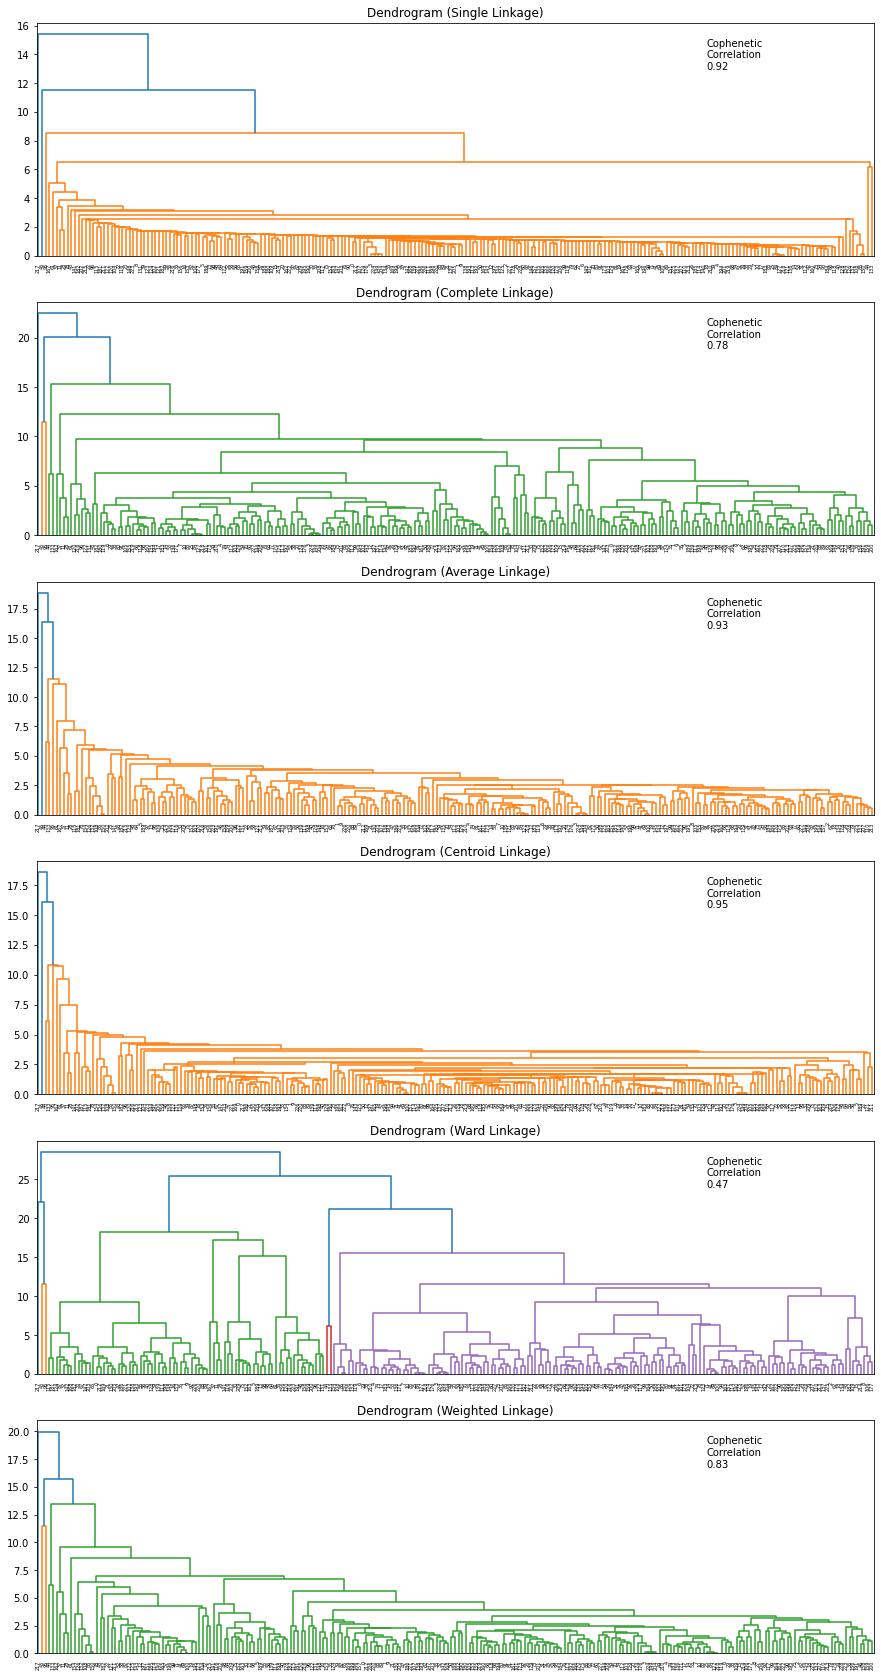

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Observations**

- The cophenetic correlation is highest for average and centroid linkage methods.
- We will move ahead with Centroid linkage.
- 6 appears to be the appropriate number of clusters from the dendrogram for Centroid linkage.

**The optimal number of clusters from a dendrogram can be obtained by deciding where to cut the cluster tree. Generally, the cluster tree is cut where dendrogram height is maximum as it generally corresponds to distinct and homogeneous clusters.
The dendrogram for centroid linkage had the highest cophenetic correlation. So we can use centroid linkage and have chosen 6 clusters as the dendrogram height is pretty high. (The maximum height is for 3, but that would not be meaningful as it would give two clusters with one country each and one cluster will all the other countries).**

**Lets visualize the dendrogram cut for average link in the below plot**

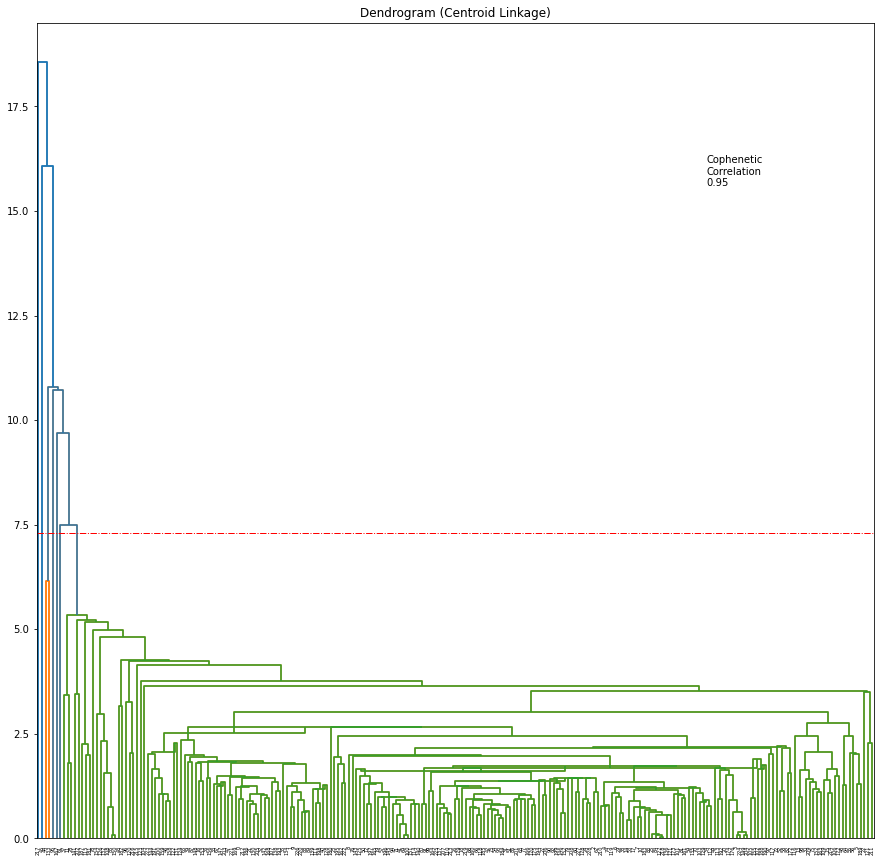

In [ ]:
# list of linkage methods
linkage_methods = ["centroid"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 15))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs)
    axs.set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs.annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )
dendrogram(Z, color_threshold=7.3)
plt.axhline(y=7.3, c="red", lw=1, linestyle="dashdot")

## Hierarchical Clustering

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(linkage='average', n_clusters=6)

In [ ]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df1["HC_Clusters"] = HCmodel.labels_

## Cluster Profiling

In [ ]:
cluster_profile = df1.groupby("HC_Clusters").mean()

In [ ]:
cluster_profile["count_in_each_segments"] = (
    df1.groupby("HC_Clusters")["Surface area"].count().values
)

In [ ]:
# let's see the names of the countries in each cluster
for cl in df1["HC_Clusters"].unique():
    print("In cluster {}, the following countries are present:".format(cl))
    print(df1[df1["HC_Clusters"] == cl]["country"].unique())
    print()

In cluster 0, the following countries are present:
['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bonaire, Sint Eustatius and Saba'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Channel Islands' 'Chile'
 'China, Hong Kong SAR' 'Colombia' 'Comoros' 'Congo' 'Cook Islands'
 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea'
 'Estonia' 'Ethiopia' 'Falkland Islands (Malvinas)' 'F

**Note:** **China** and **China, Macao SAR** are two different countries in the dataset.

**We see that there are 5 clusters of one country, 1 cluster of two countries, and all the other countries are grouped into another cluster. This clustering does not look good as the clusters do not have enough variability.**

**On checking the cluster profiles, it's found centroid linkage still does not give proper clustering as 5 clusters have one or two countries in them. On checking the dendrogram for different linkages further, the Ward linkage gives us homogeneous clusters, with more variability between clusters, despite a low cophenetic correlation. Let us try using Ward linkage as it has more distinct and separated clusters (as seen from its dendrogram before). 6 appears to be the appropriate number of clusters from the dendrogram for Ward linkage.**

**Lets visualize the dendrogram cut for ward linkage in the below plot**

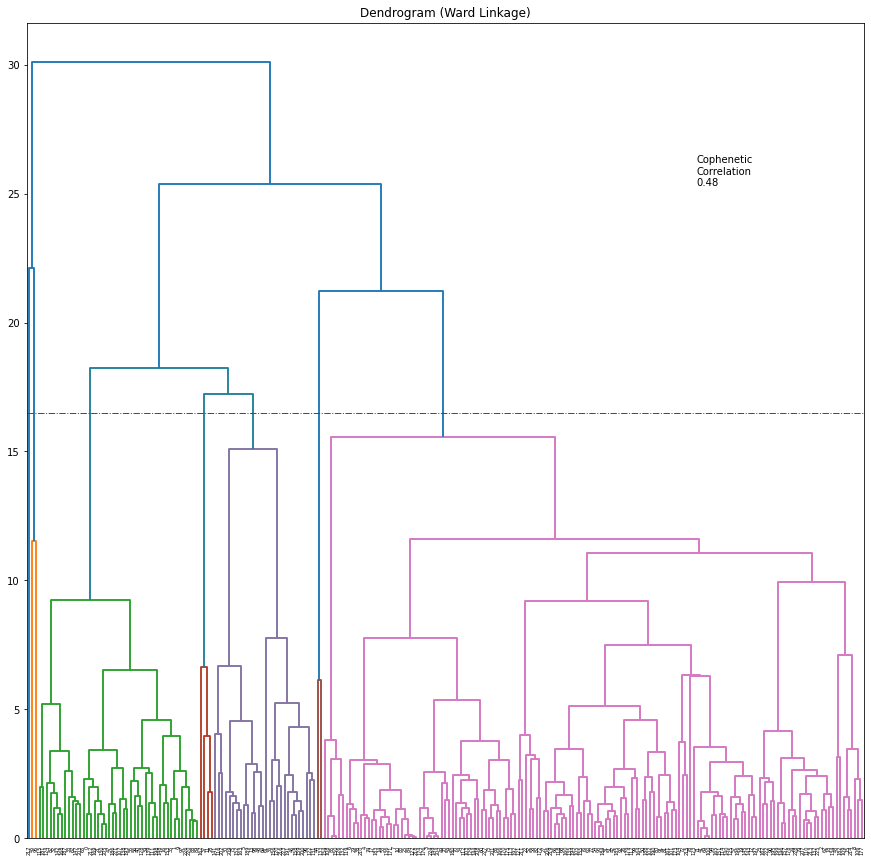

In [ ]:
# list of linkage methods
linkage_methods = ["ward"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 15))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs)
    axs.set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs.annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )
dendrogram(Z, color_threshold=16.5)
plt.axhline(y=16.5, c="red", lw=1, linestyle="dashdot")

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(n_clusters=6)

In [ ]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df1["HC_Clusters"] = HCmodel.labels_

## Cluster Profiling

In [ ]:
cluster_profile = df1.groupby("HC_Clusters").mean()

In [ ]:
cluster_profile["count_in_each_segments"] = (
    df1.groupby("HC_Clusters")["Surface area"].count().values
)

In [ ]:
# let's see the names of the countries in each cluster
for cl in df1["HC_Clusters"].unique():
    print(
        "The",
        df1[df1["HC_Clusters"] == cl]["country"].nunique(),
        "countries in cluster",
        cl,
        "are:",
    )
    print(df1[df1["HC_Clusters"] == cl]["country"].unique())
    print("-" * 100, "\n")

The 44 countries in cluster 5 are:
['Afghanistan' 'Albania' 'Armenia' 'Bangladesh' 'Benin' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Central African Republic' 'Chad' 'Comoros'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Eritrea' 'Ethiopia' 'Guinea-Bissau'
 'Guinea' 'Guyana' 'Iran (Islamic Republic of)' 'Kenya'
 "Lao People's Democratic Republic" 'Liberia' 'Mali' 'Mauritania'
 'Mayotte' 'Mozambique' 'Myanmar' 'Nepal' 'Niger' 'Nigeria' 'Pakistan'
 'Rwanda' 'Saint Helena' 'Sierra Leone' 'Solomon Islands' 'Somalia'
 'Sudan' 'Syrian Arab Republic' 'Togo' 'Tonga' 'Uganda' 'Uzbekistan'
 'Vanuatu' 'Yemen']
---------------------------------------------------------------------------------------------------- 

The 148 countries in cluster 2 are:
['Algeria' 'American Samoa' 'Andorra' 'Anguilla' 'Antigua and Barbuda'
 'Argentina' 'Aruba' 'Austria' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Bermuda' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bonair

**Now the clusters seem to have more variability.**

In [ ]:
# lets display cluster profile
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Surface area,Population in thousands,Population density,GDP: Gross domestic product,Economy: Agriculture,Economy: Industry,Economy: Services and other activity,International trade: Balance,Health: Total expenditure,Education: Government expenditure,Mobile-cellular subscriptions,Individuals using the Internet,count_in_each_segments
HC_Clusters,,,,,,,,,,,,,
0,1857323.781250,45709.656250,97.065625,329348.031250,8.393750,43.871875,47.746875,4106.187500,4.906250,4.314062,107.571875,551.812500,32
1,6443631.500000,1374348.500000,300.250000,6637348.000000,13.100000,35.400000,51.450000,216953.500000,5.100000,3.700000,86.000000,1066.000000,2
2,220764.489865,10516.020270,331.800676,213967.959459,6.521284,24.186149,68.686149,915.722973,7.706081,5.362162,115.291216,120.317568,148
3,9833517.000000,324460.000000,35.500000,18036648.000000,1.000000,19.700000,79.300000,-796494.000000,17.100000,5.400000,117.600000,1513.000000,1
4,16.000000,331.000000,23395.700000,26218.000000,3.225000,10.000000,90.000000,8826.500000,5.375000,1.500000,206.600000,16.000000,2
5,460865.261364,32009.250000,144.247727,46650.704545,28.867045,23.895455,46.960227,-882.261364,5.530682,3.723864,69.051136,147.613636,44


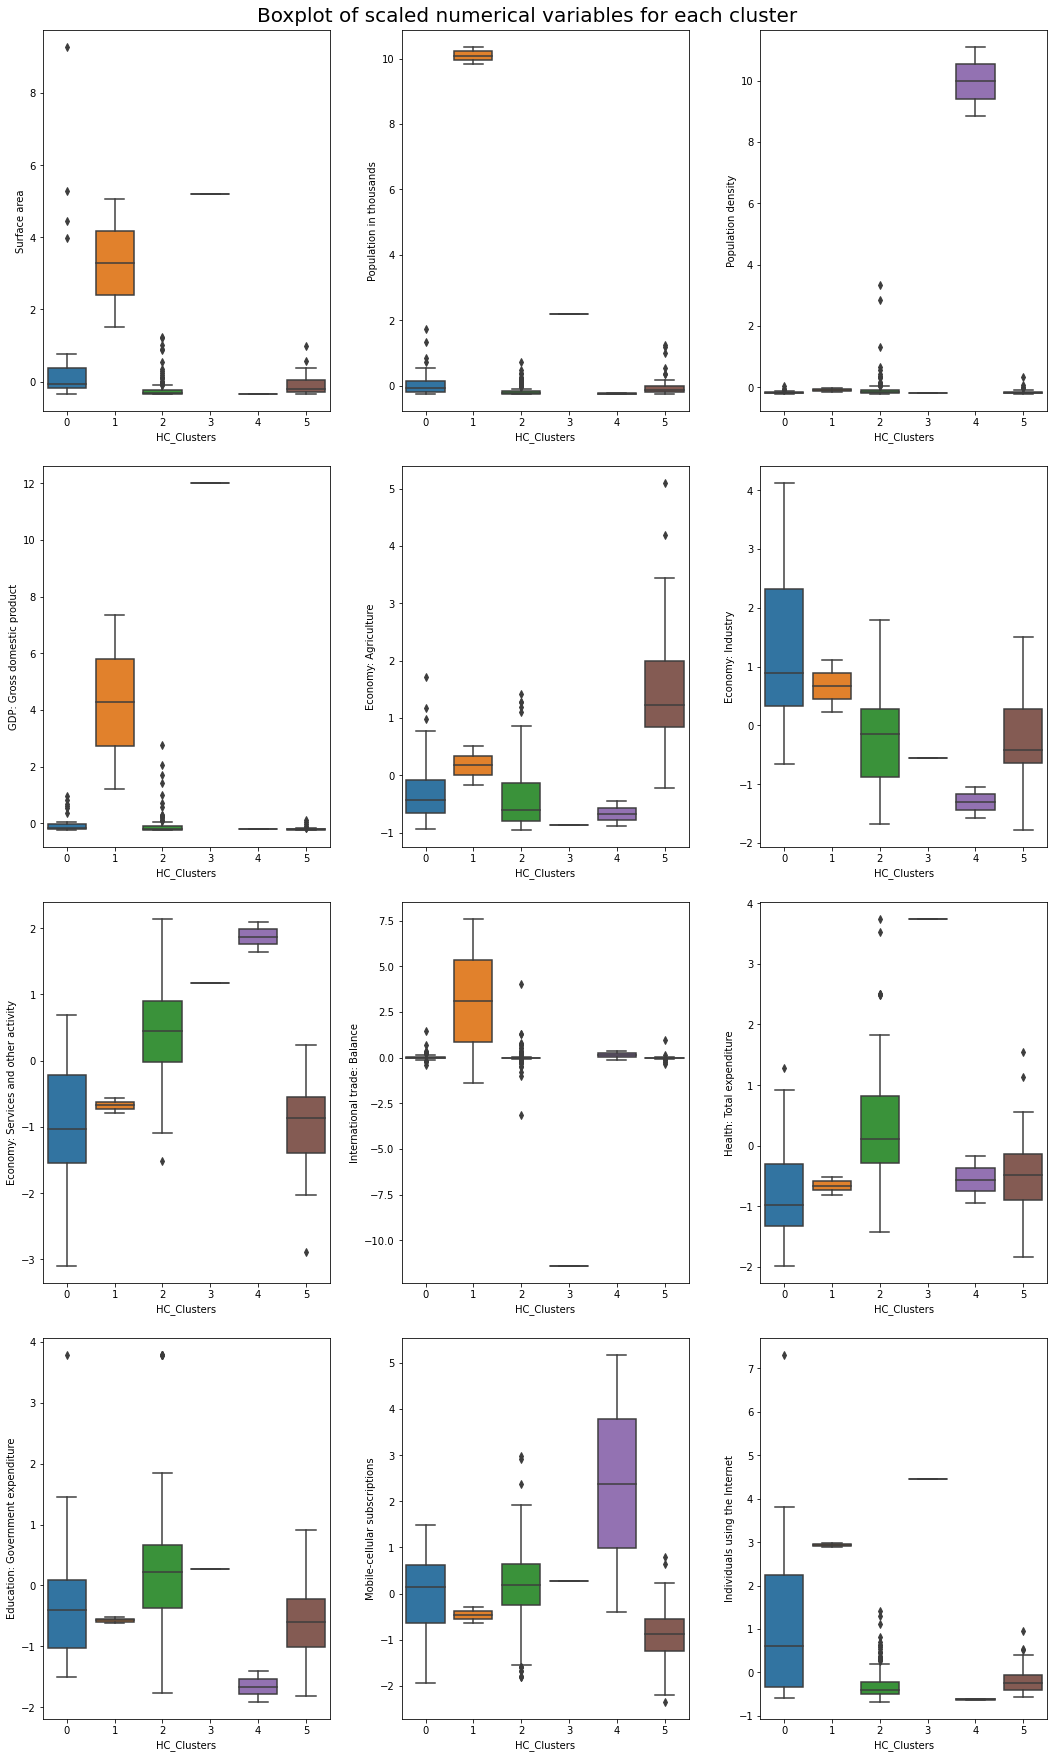

In [ ]:
fig, axes = plt.subplots(4, 3, figsize=(15, 25))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(4):
    sns.boxplot(
        ax=axes[ii][0],
        y=subset_scaled_df[num_cols[counter]],
        x=subset_scaled_df["HC_Clusters"],
    )
    counter = counter + 1
    sns.boxplot(
        ax=axes[ii][1],
        y=subset_scaled_df[num_cols[counter]],
        x=subset_scaled_df["HC_Clusters"],
    )
    counter = counter + 1
    sns.boxplot(
        ax=axes[ii][2],
        y=subset_scaled_df[num_cols[counter]],
        x=subset_scaled_df["HC_Clusters"],
    )
    counter = counter + 1


fig.tight_layout(pad=2.0)

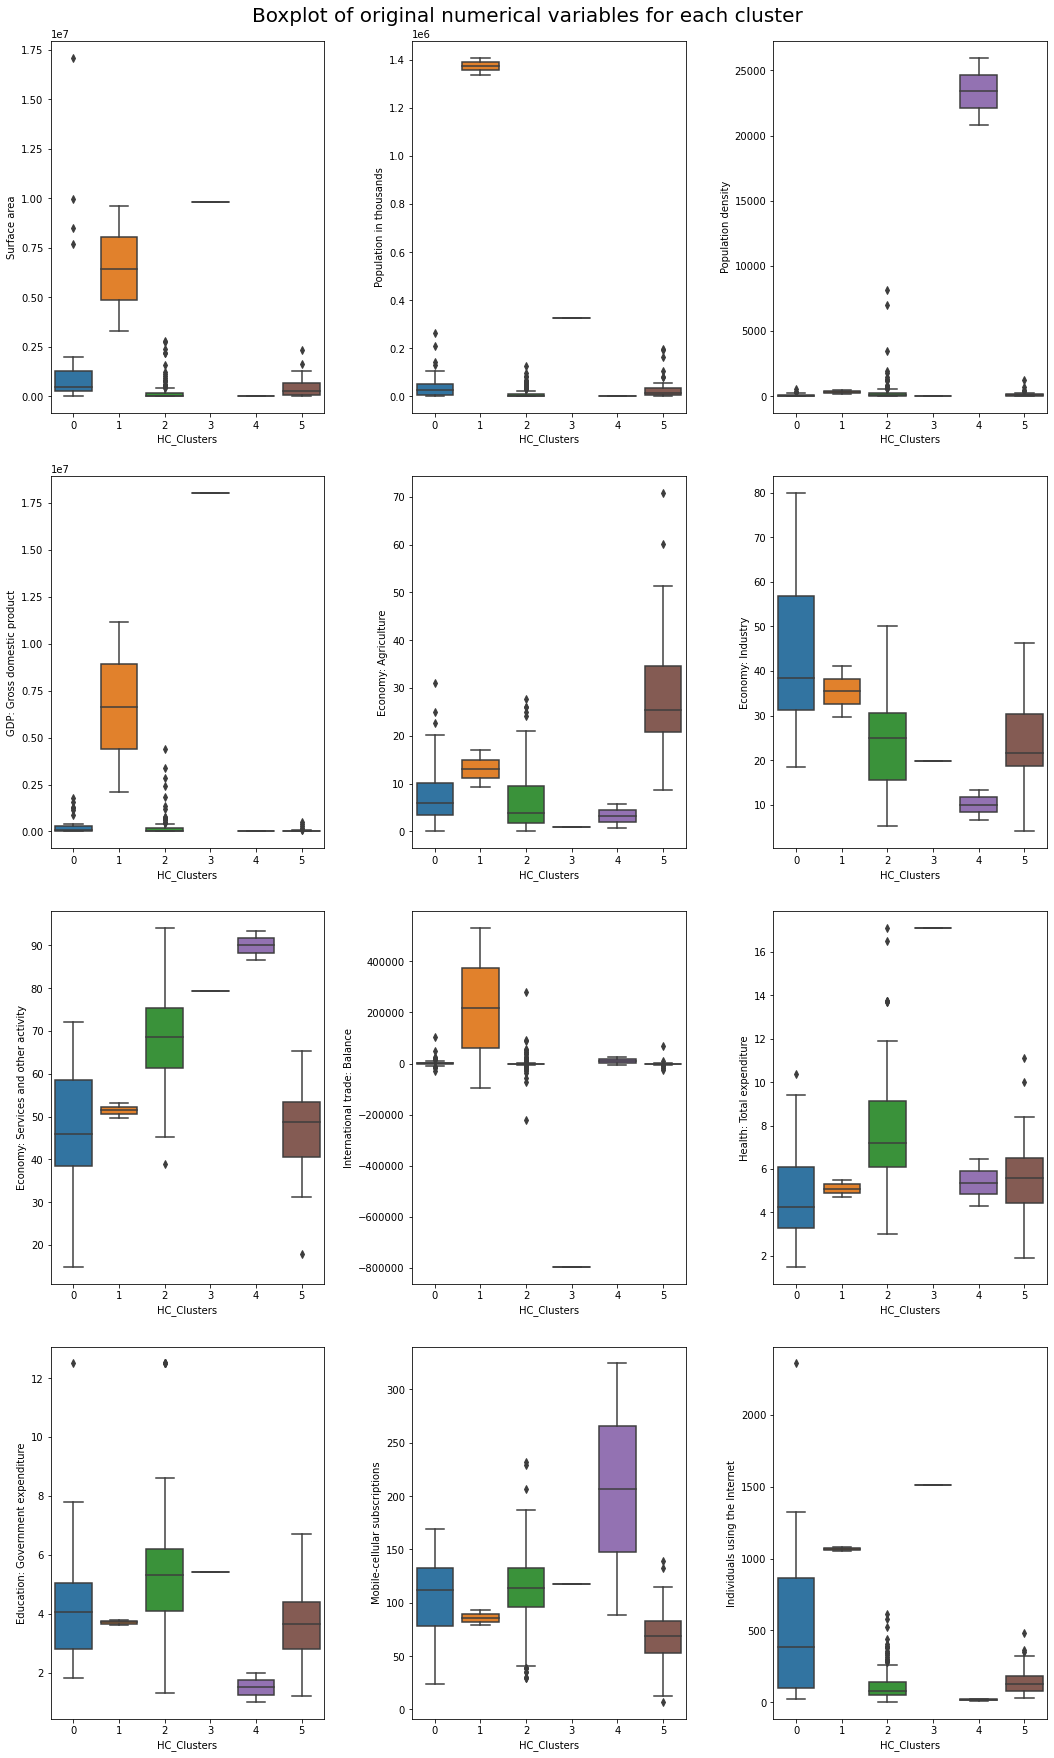

In [ ]:
fig, axes = plt.subplots(4, 3, figsize=(15, 25))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(4):
    sns.boxplot(ax=axes[ii][0], y=df1[num_cols[counter]], x=df1["HC_Clusters"])
    counter = counter + 1
    sns.boxplot(ax=axes[ii][1], y=df1[num_cols[counter]], x=df1["HC_Clusters"])
    counter = counter + 1
    sns.boxplot(ax=axes[ii][2], y=df1[num_cols[counter]], x=df1["HC_Clusters"])
    counter = counter + 1


fig.tight_layout(pad=2.0)

## Insights

We will look into clusters 0, 2, and 5 only because the other clusters have only 1 or 2 countries in them.

- **Cluster 0**
   - There are 32 countries in this cluster.
   - The number of individuals using the internet is moderate and mobile subscribers are moderate.
   - Expenditure on health is low to moderate and that on education is also low to moderate.
   - GDP is low, but the economy in healthy and balanced across agriculture, industry, services, and other activities are high
   
   
- **Cluster 2**
   - There are 148 countries in this cluster.
   - The number of individuals using the internet is high but mobile subscribers are moderate.
   - Expenditure on health is moderate and that on education is also moderate.
   - GDP is moderate and economy is moderately healthy with a slightly high dependence on services and other activities.
   
   
- **Cluster 5**
   - There are 44 countries in this cluster.
   - The number of individuals using the internet are moderate and mobile subscribers are also moderate.
   - Expenditure on health is moderate and that on education is low.
   - GDP is moderate and economy is moderately healthy with a slightly high dependence on services and other activities.


## Recommendations

**Cluster 5 countries are good places to provide tourism services based on cluster profiling done above.**

## Dimensionality Reduction using PCA for visualization

- Let's use PCA to reduce the data to two dimensions and visualize it to see how well-separated the clusters are.

In [ ]:
# importing library
from sklearn.decomposition import PCA

# setting the number of components to 2
pca = PCA(n_components=3)

# transforming data and storing results in a dataframe
X_reduced_pca = pca.fit_transform(subset_scaled_df)
reduced_df_pca = pd.DataFrame(
    data=X_reduced_pca, columns=["Component 1", "Component 2",'Component 3']
)

In [ ]:
# checking the amount of variance explained
pca.explained_variance_ratio_.sum()

0.5617794514605208

- The first two principal components explain 48.5% of the variance in the data.

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

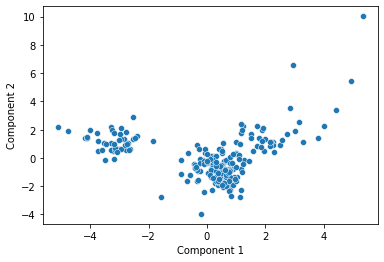

In [ ]:
sns.scatterplot(data=reduced_df_pca, x="Component 1", y="Component 2")

- We can kind of see two broad clusters if we draw a horizontal line around y=1.
- There a few outlier points too.

Let's colour the scatterplot by cluster labels.

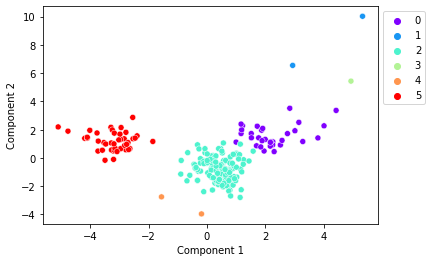

In [ ]:
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df1["HC_Clusters"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))

- Cluster 0,2 and 5 are the major clusters.

##### Happy Learning!